In [1]:
%run 'init.ipynb'

In [2]:
import datetime

In [3]:
def volatility():
    return 0
test = aapl_days[0]#.set_index('Hour')

In [4]:
new_test = aapl_days[0]
new_test

Hour                 Time      Open      High  \
Day        Ticker                                                      
2021-08-02 AAPL    09:00:00  2021-08-02 09:00:00  146.3607  146.4606   
           AAPL    09:01:00  2021-08-02 09:01:00  146.4506  146.5404   
           AAPL    09:02:00  2021-08-02 09:02:00  146.5005  146.5305   
           AAPL    09:03:00  2021-08-02 09:03:00  146.5404  146.5604   
           AAPL    09:04:00  2021-08-02 09:04:00  146.5205  146.5604   
...                     ...                  ...       ...       ...   
           AAPL    15:55:00  2021-08-02 15:55:00  145.3772  145.3822   
           AAPL    15:56:00  2021-08-02 15:56:00  145.2923  145.3273   
           AAPL    15:57:00  2021-08-02 15:57:00  145.2424  145.3123   
           AAPL    15:58:00  2021-08-02 15:58:00  145.3023  145.3023   
           AAPL    15:59:00  2021-08-02 15:59:00  145.2474  145.3323   

                        Low     Close  Volume  
Day        Ticker                              
2021-08-02 AAPL    146.3607  146.4606    6475  
           AAPL    146.4007  146.5005   20827  
           AAPL    146.4805  146.5305    4227  
           AAPL    146.5105  146.5205    3198  
           AAPL    146.5205  146.5604    3503  
...                     ...       ...     ...  
           AAPL    145.2873  145.2923  216938  
           AAPL    145.2424  145.2523  237200  
           AAPL    145.2324  145.3122  259082  
           AAPL    145.2424  145.2424  192529  
           AAPL    145.1525  145.3023  648594  

[420 rows x 7 columns]

In [5]:
new_test['Pct Change'] = ((new_test['Open'].loc[:] - new_test['Open'].loc[:].shift(1)) / new_test['Open'].loc[:].shift(1)) * 100

<ipython-input-5-b884d7788ba7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_test['Pct Change'] = ((new_test['Open'].loc[:] - new_test['Open'].loc[:].shift(1)) / new_test['Open'].loc[:].shift(1)) * 100


In [6]:
new_test['Pct Change'] = ((new_test['Open'].loc[:] - new_test['Open'].loc[:].shift(1)) / new_test['Open'].loc[:].shift(1)) * 100

<ipython-input-6-b884d7788ba7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_test['Pct Change'] = ((new_test['Open'].loc[:] - new_test['Open'].loc[:].shift(1)) / new_test['Open'].loc[:].shift(1)) * 100


In [7]:
new_test['Pct Change'].mean()

-0.0018112025042174161

In [8]:
test[['Open', 'Hour']].apply(func=lambda x: (x.iloc[3::6] - x.iloc[::6]) / x.iloc[::6] * 100, axis=1)

Open
Day        Ticker      
2021-08-02 AAPL     NaN
           AAPL     NaN
           AAPL     NaN
           AAPL     NaN
           AAPL     NaN
...                 ...
           AAPL     NaN
           AAPL     NaN
           AAPL     NaN
           AAPL     NaN
           AAPL     NaN

[420 rows x 1 columns]

### Write a for loop that trades on each day in a stock array and calculates how much profit would be made using certain algorithms

* How far you deviate from a day's average should justify trading
* If you are deviating a lot up, short, if deviating down, buy
* The change every 3 minutes averages to 0
* Volume affects how quickly the Open price changes - low volume means prices stay stagnant
* Maybe only trade when volume is high enough to create volatility

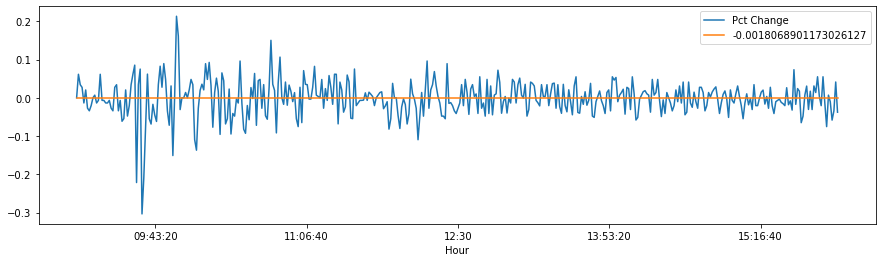

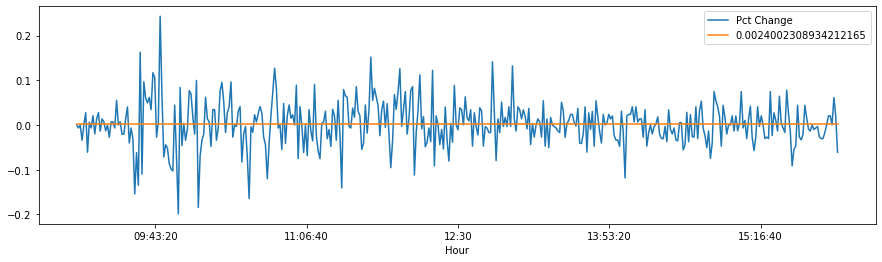

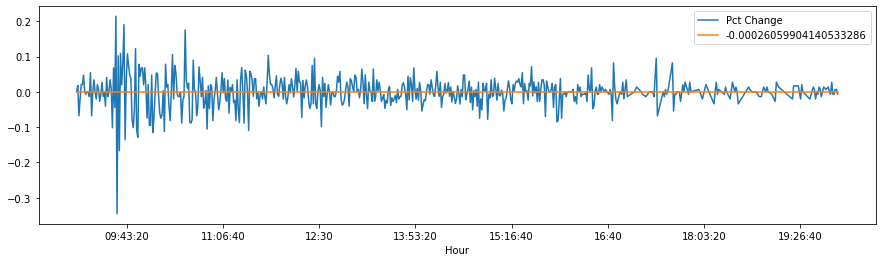

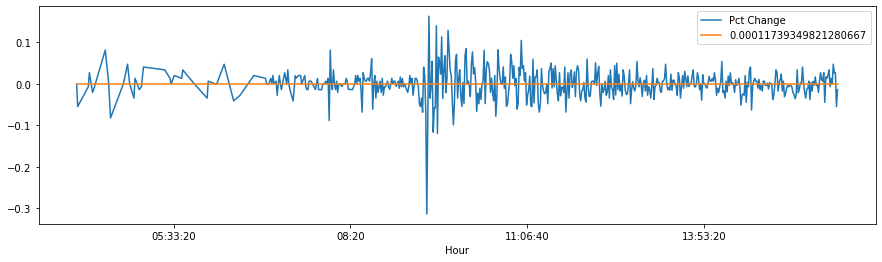

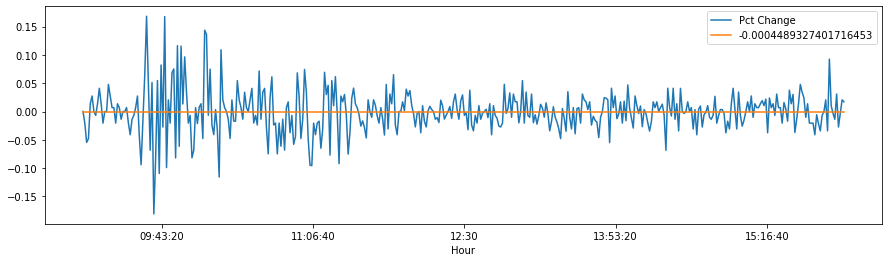

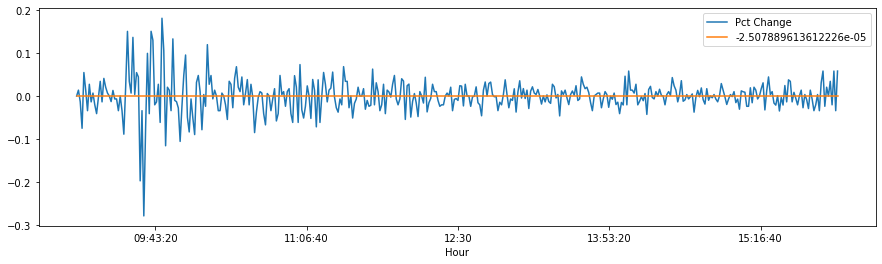

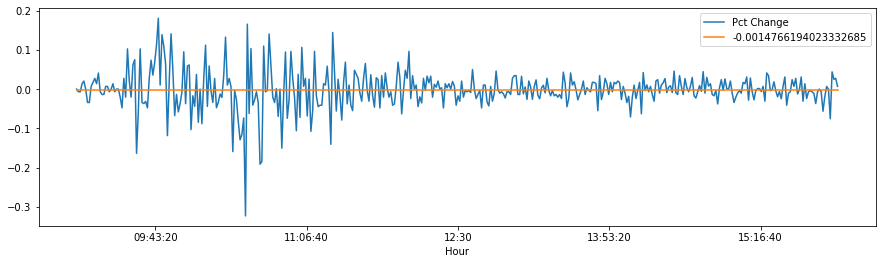

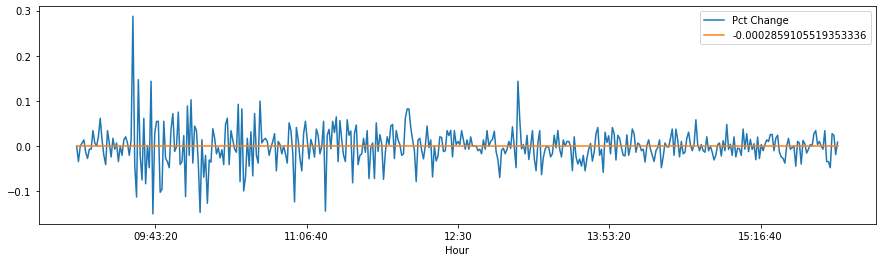

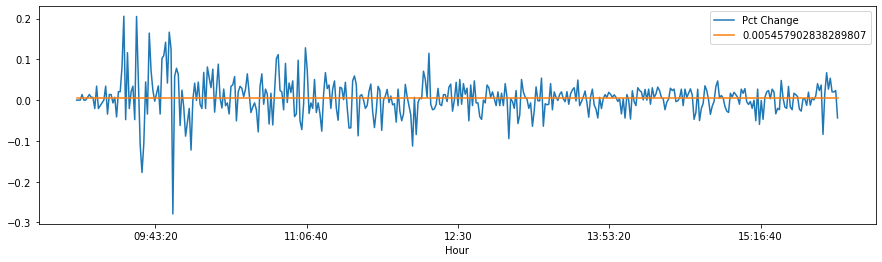

In [9]:
# Check one minute
# 1 min average: should be done every 1 minute in real-time
for tmp in aapl_days:
    day = tmp.loc[:]
    # percent change every 1 minute
    day['Pct Change'] = (((day.loc[:, 'Open'] - day.loc[:, 'Open'].shift(1)) / day.loc[:,'Open'].shift(1)) * 100).fillna(0)
    day['Average'] = day.loc[:,'Pct Change'].mean()

    # Calculate mean for each day and plot
    ax = day.plot('Hour', 'Pct Change')
    day.plot('Hour', 'Average', ax=ax, figsize=(15,4))
    ax.legend(['Pct Change', day['Average'][0]])

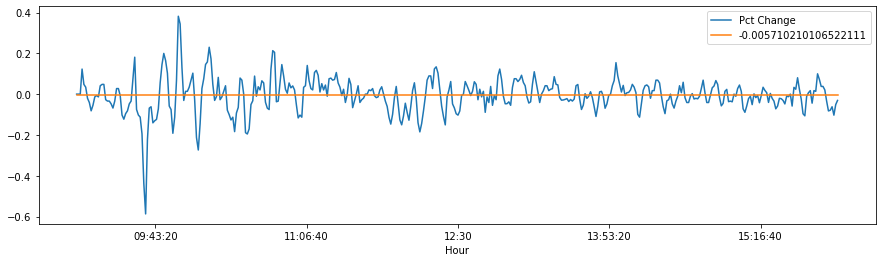

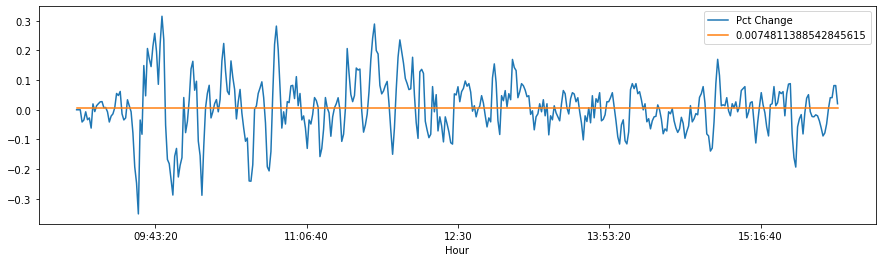

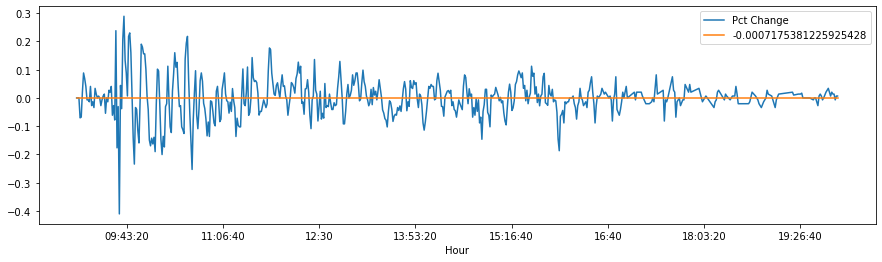

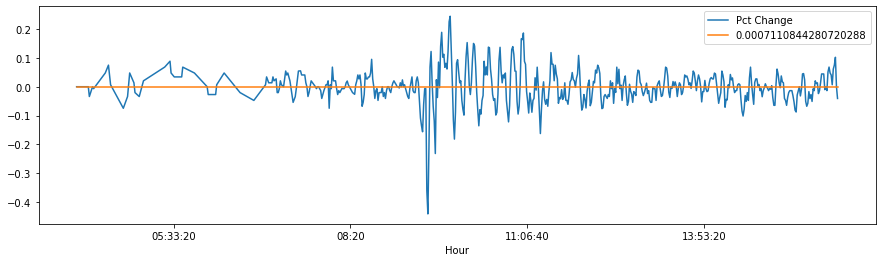

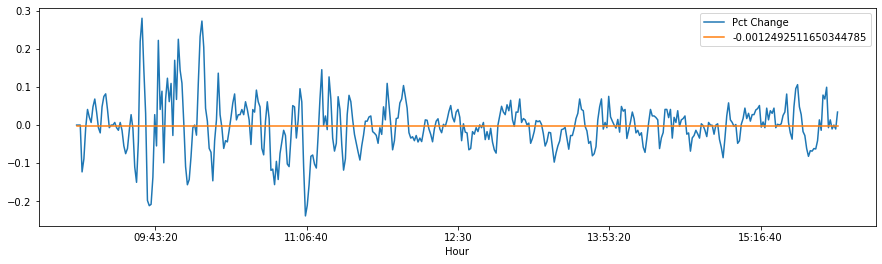

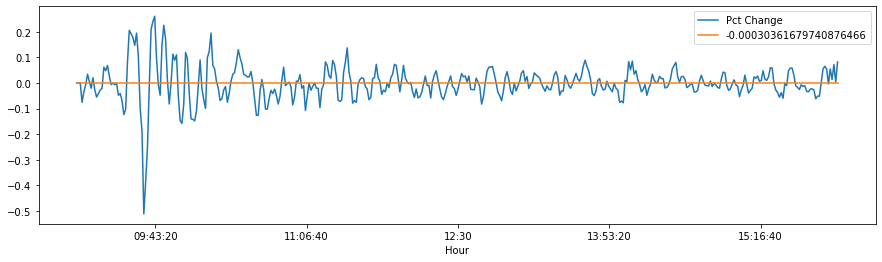

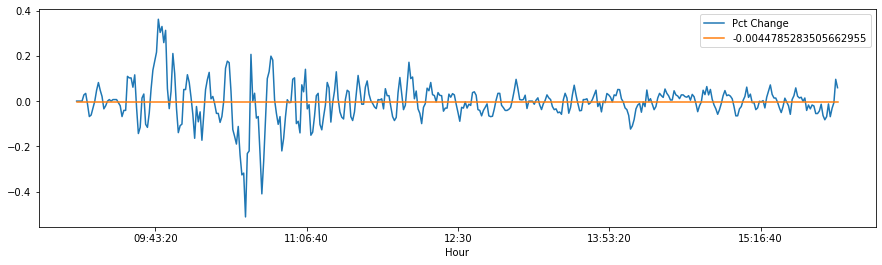

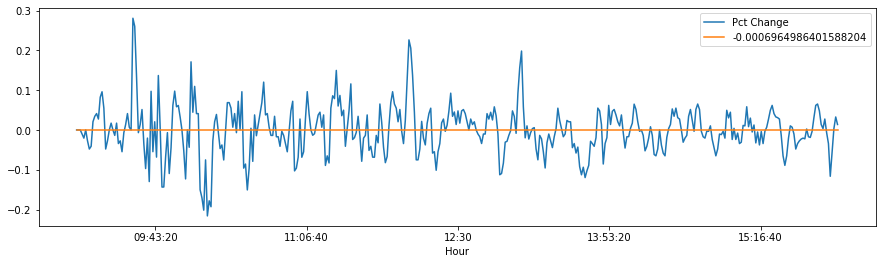

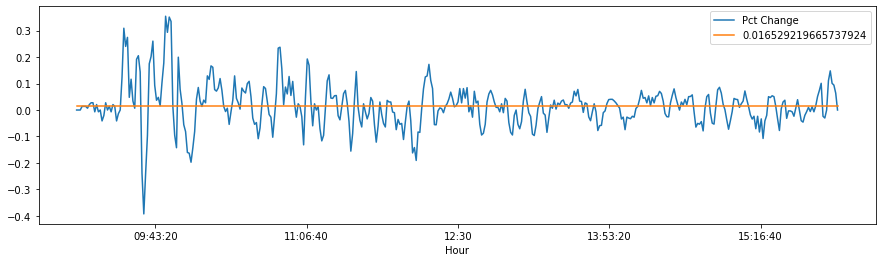

In [10]:
for tmp in aapl_days:
    day = tmp.loc[:]
    # percent change every 1 minute
    period = 3
    current = day.loc[:, 'Open']
    previous = day.loc[:, 'Open'].shift(period)
    day['Pct Change'] = (((current - previous) / previous) * 100).fillna(0)
    day['Average'] = day.loc[:,'Pct Change'].mean()

    # Calculate mean for each day and plot
    ax = day.plot('Hour', 'Pct Change')
    day.plot('Hour', 'Average', ax=ax, figsize=(15,4))
    ax.legend(['Pct Change', day['Average'][0]])

In [11]:
#for i in np.arange(start=5, stop=len(day.index), step=5):
#    print(day.iloc[i,:])

In [12]:
# Average Time to Repeat a Price
# Make every minute a variable

In [13]:
collapse = np.where(test == 148.1)[0]
collapse.size

0

In [14]:
test

Hour                 Time      Open      High  \
Day        Ticker                                                      
2021-08-02 AAPL    09:00:00  2021-08-02 09:00:00  146.3607  146.4606   
           AAPL    09:01:00  2021-08-02 09:01:00  146.4506  146.5404   
           AAPL    09:02:00  2021-08-02 09:02:00  146.5005  146.5305   
           AAPL    09:03:00  2021-08-02 09:03:00  146.5404  146.5604   
           AAPL    09:04:00  2021-08-02 09:04:00  146.5205  146.5604   
...                     ...                  ...       ...       ...   
           AAPL    15:55:00  2021-08-02 15:55:00  145.3772  145.3822   
           AAPL    15:56:00  2021-08-02 15:56:00  145.2923  145.3273   
           AAPL    15:57:00  2021-08-02 15:57:00  145.2424  145.3123   
           AAPL    15:58:00  2021-08-02 15:58:00  145.3023  145.3023   
           AAPL    15:59:00  2021-08-02 15:59:00  145.2474  145.3323   

                        Low     Close  Volume  Pct Change  
Day        Ticker                                          
2021-08-02 AAPL    146.3607  146.4606    6475    0.000000  
           AAPL    146.4007  146.5005   20827    0.000000  
           AAPL    146.4805  146.5305    4227    0.000000  
           AAPL    146.5105  146.5205    3198    0.122779  
           AAPL    146.5205  146.5604    3503    0.047729  
...                     ...       ...     ...         ...  
           AAPL    145.2873  145.2923  216938   -0.078905  
           AAPL    145.2424  145.2523  237200   -0.061837  
           AAPL    145.2324  145.3122  259082   -0.103032  
           AAPL    145.2424  145.2424  192529   -0.051521  
           AAPL    145.1525  145.3023  648594   -0.030903  

[420 rows x 8 columns]

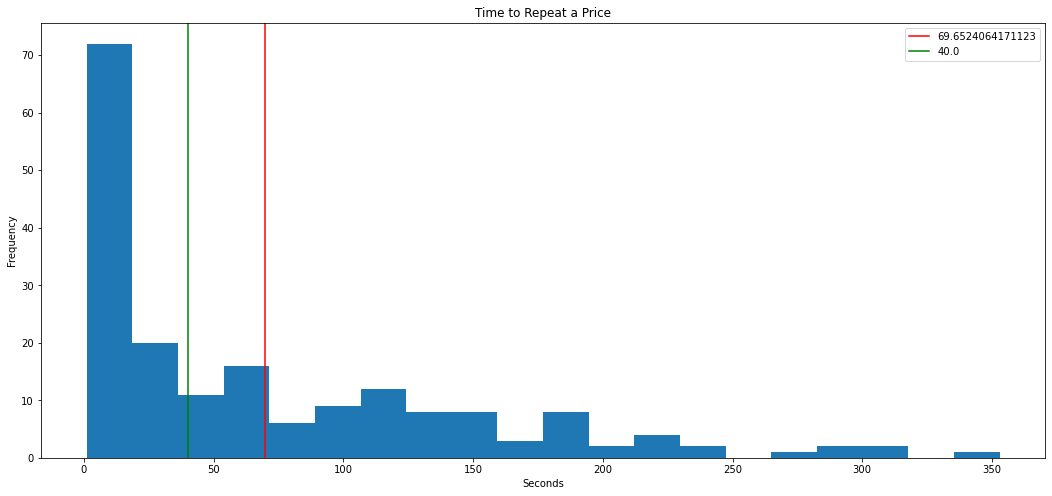

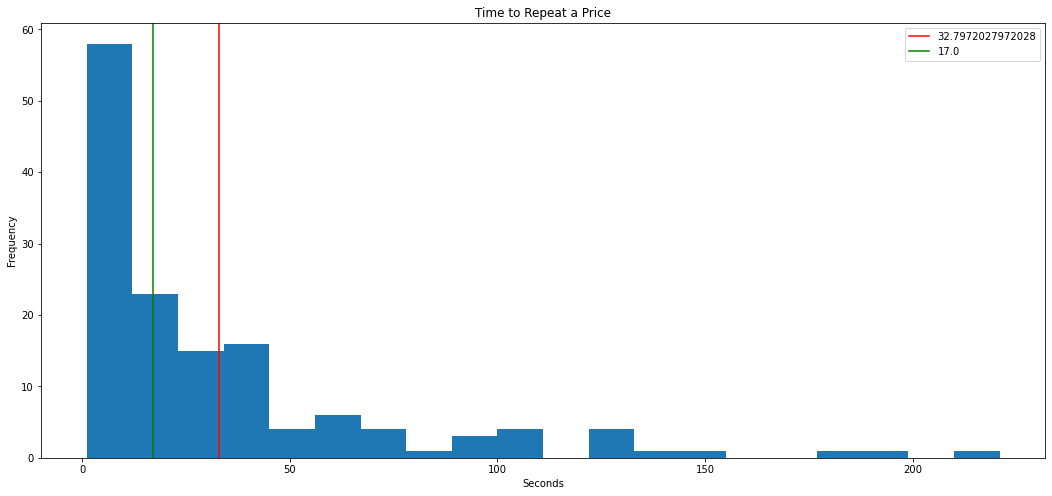

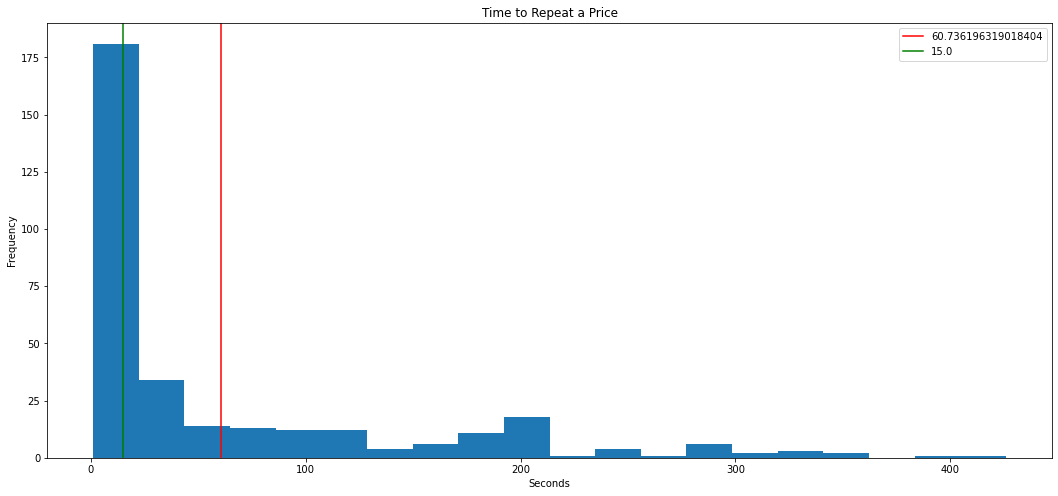

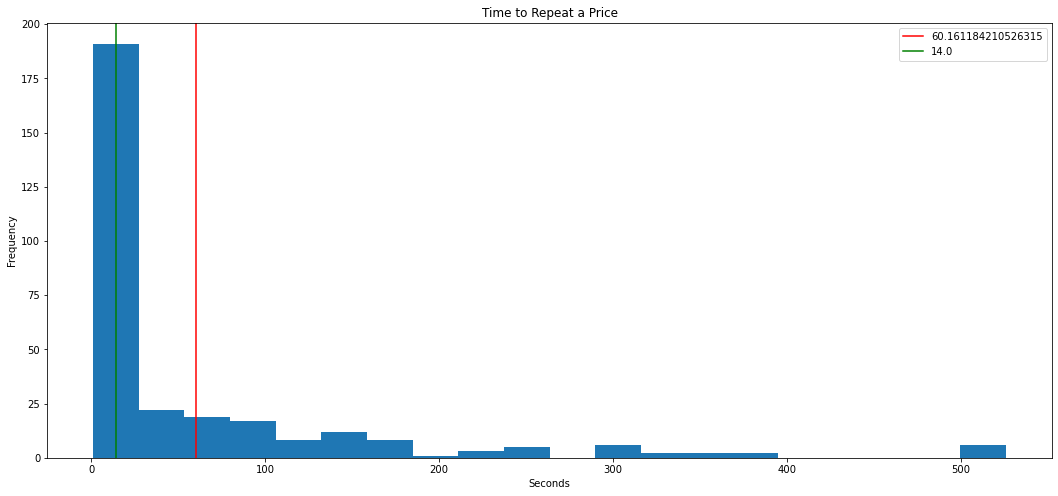

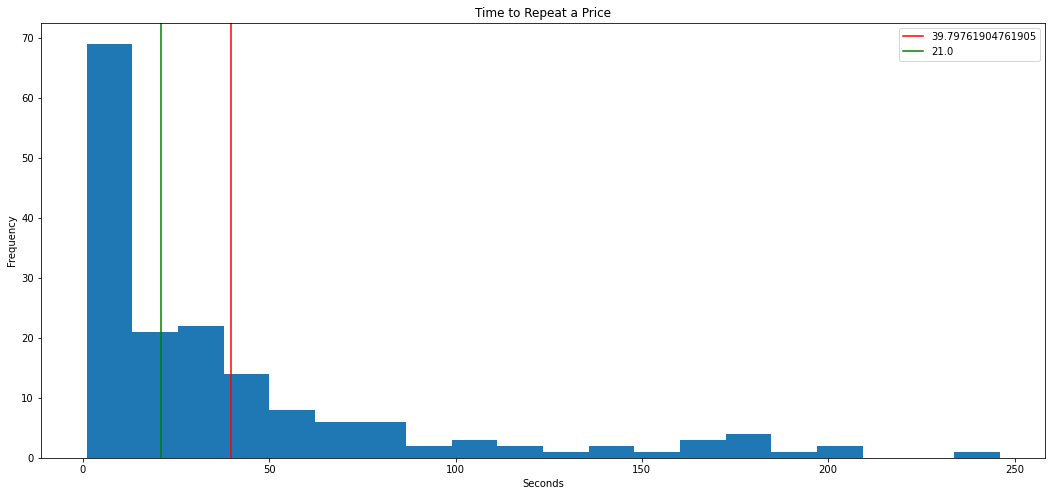

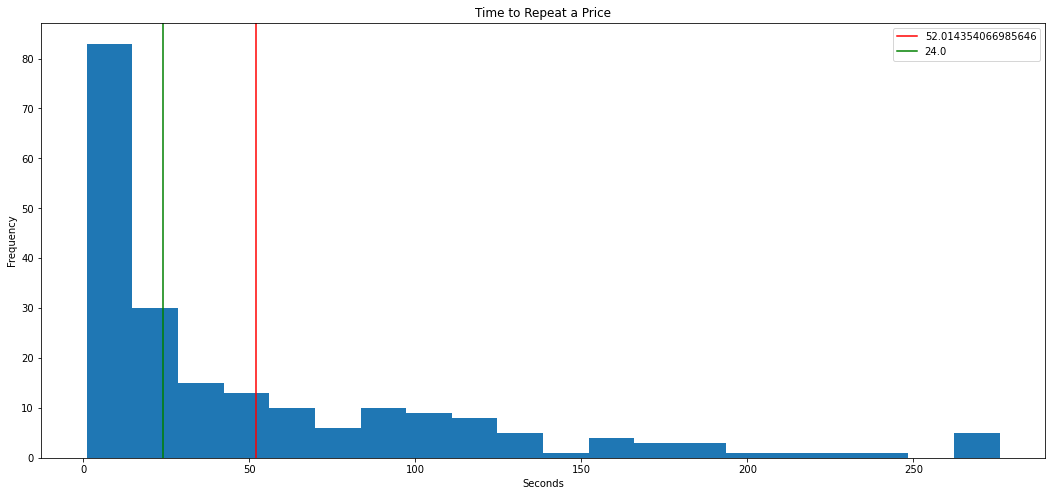

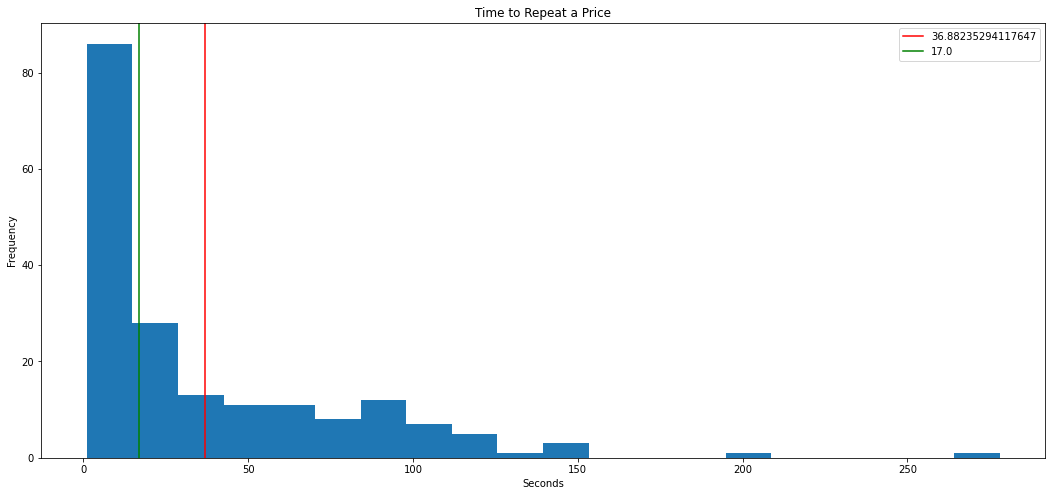

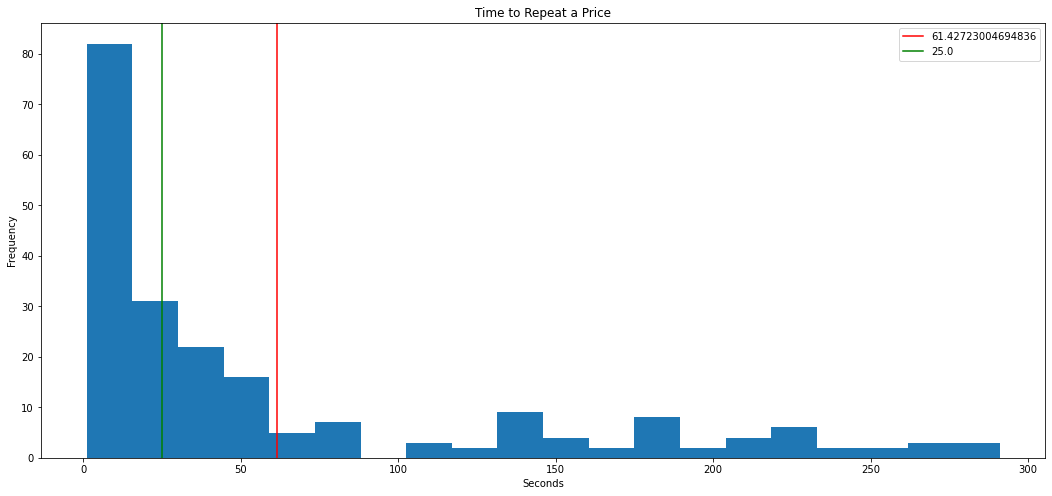

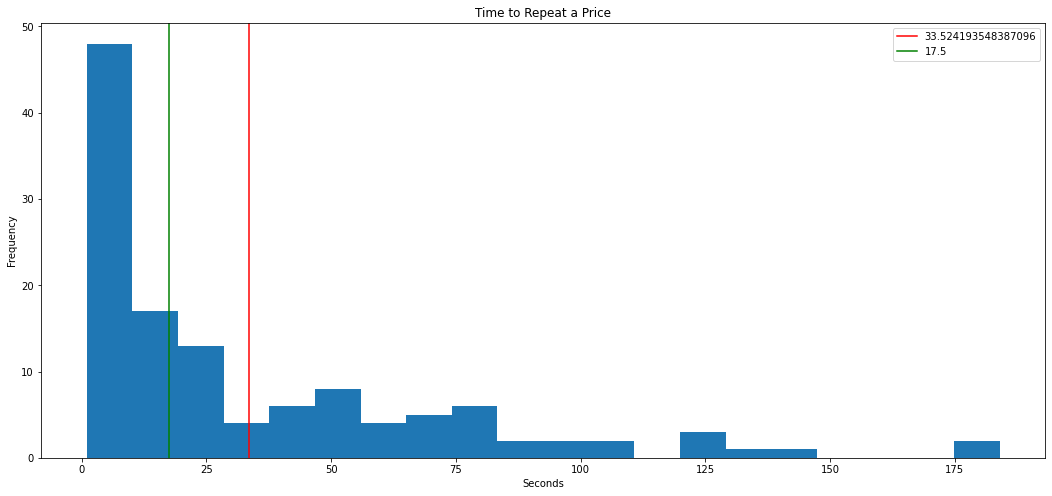

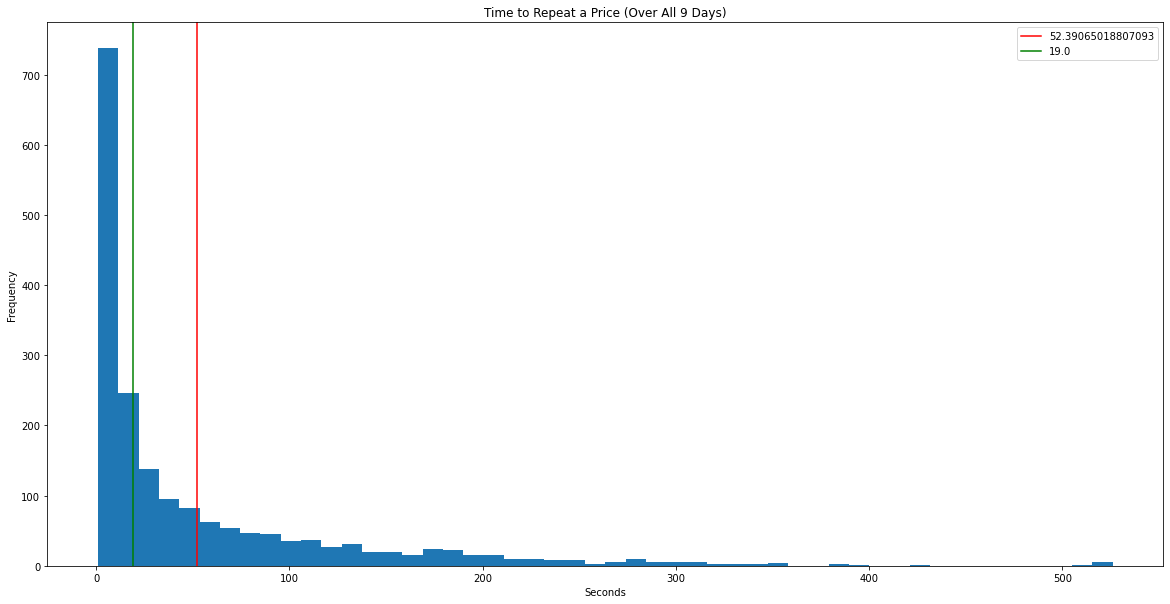

In [15]:
collated = np.array([])
for day in aapl_days:
    avg_time = []
    prices = np.array(day['Open'])
    for i in range(len(prices)):
        # get elems where the future price is within some percentage of the current price
        elem = np.where(abs(prices[i+1:] - prices[i]) == 0)[0]    # np.where creates a nested array so collapse one level
        if elem.size != 0:
            # adding one because the array shifted in the above array splicing
            avg_time.append(elem[0] + 1)
    # plot average/median time-to-repeat-price for the day
    pd.Series(data = avg_time).plot.hist(bins=20, figsize=(18,8))

    plt.axvline(np.mean(avg_time), color='red', label='Mean')
    plt.axvline(np.median(avg_time), color='green', label='Median')

    plt.legend([np.mean(avg_time), np.median(avg_time)])
    plt.title("Time to Repeat a Price")
    plt.xlabel("Seconds")

    plt.show()
    # creating master list
    collated = np.append(collated, avg_time)
# plot average/median time-to-repeat-price for all days
collated = np.ravel(collated) # .ravel flattens an array to 1D
pd.Series(data=collated).plot.hist(bins=50, figsize=(20,10))

plt.axvline(np.mean(collated),color='red', label='Mean')
plt.axvline(np.median(collated), color='green', label='Median')

plt.legend([np.mean(collated), np.median(collated)])
plt.title("Time to Repeat a Price (Over All 9 Days)")
plt.xlabel("Seconds")

plt.show()

In [16]:
aapl_days

[                       Hour                 Time      Open      High  \
 Day        Ticker                                                      
 2021-08-02 AAPL    09:00:00  2021-08-02 09:00:00  146.3607  146.4606   
            AAPL    09:01:00  2021-08-02 09:01:00  146.4506  146.5404   
            AAPL    09:02:00  2021-08-02 09:02:00  146.5005  146.5305   
            AAPL    09:03:00  2021-08-02 09:03:00  146.5404  146.5604   
            AAPL    09:04:00  2021-08-02 09:04:00  146.5205  146.5604   
 ...                     ...                  ...       ...       ...   
            AAPL    15:55:00  2021-08-02 15:55:00  145.3772  145.3822   
            AAPL    15:56:00  2021-08-02 15:56:00  145.2923  145.3273   
            AAPL    15:57:00  2021-08-02 15:57:00  145.2424  145.3123   
            AAPL    15:58:00  2021-08-02 15:58:00  145.3023  145.3023   
            AAPL    15:59:00  2021-08-02 15:59:00  145.2474  145.3323   
 
                         Low     Close  Volume  P

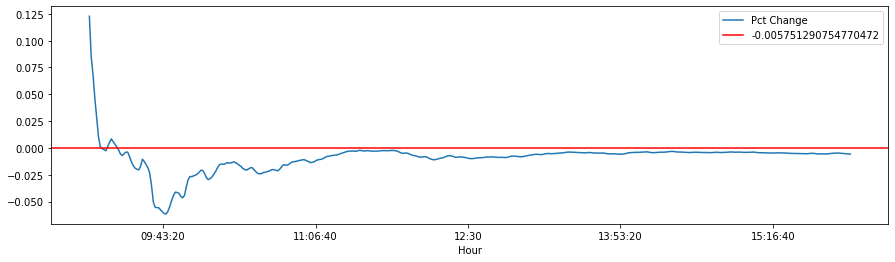

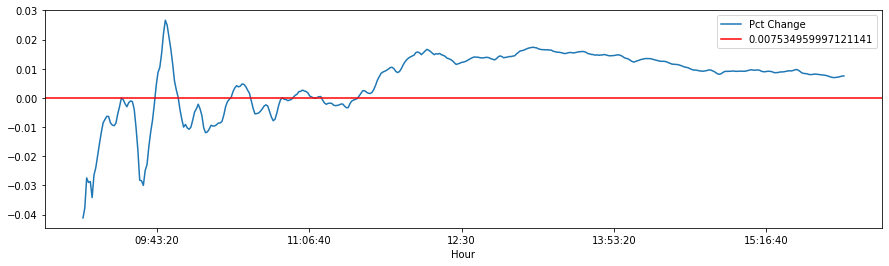

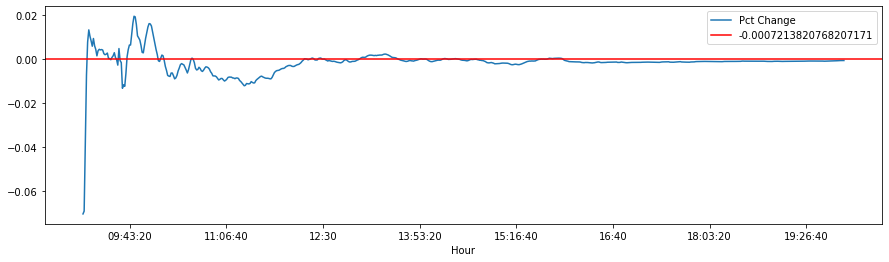

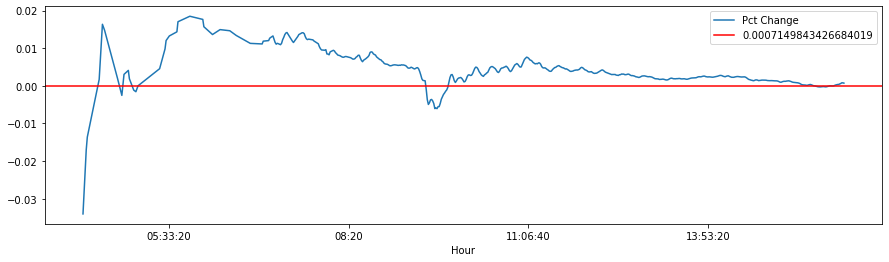

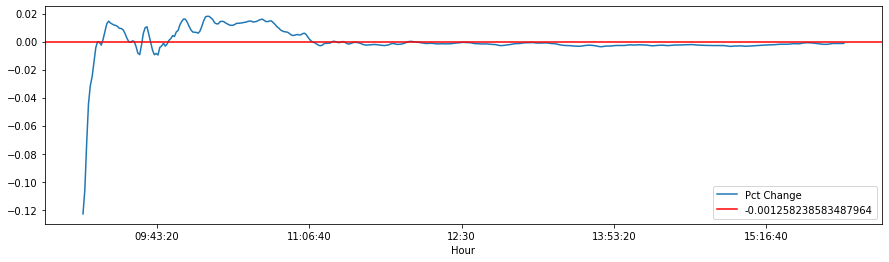

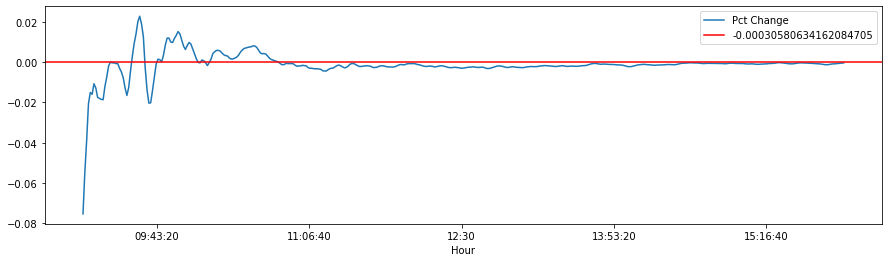

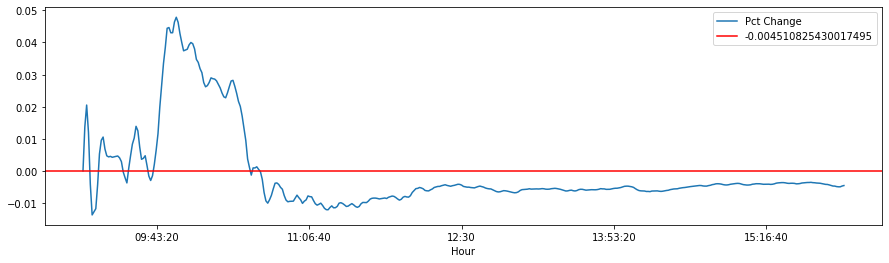

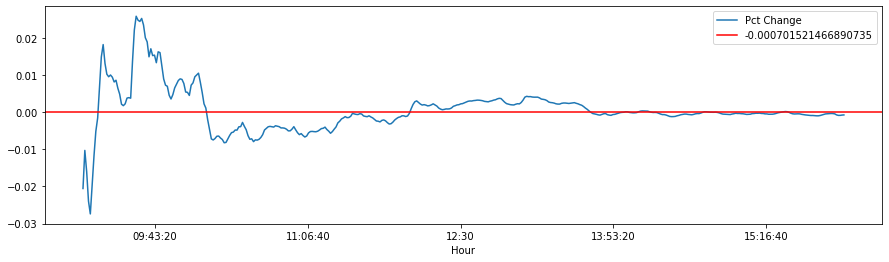

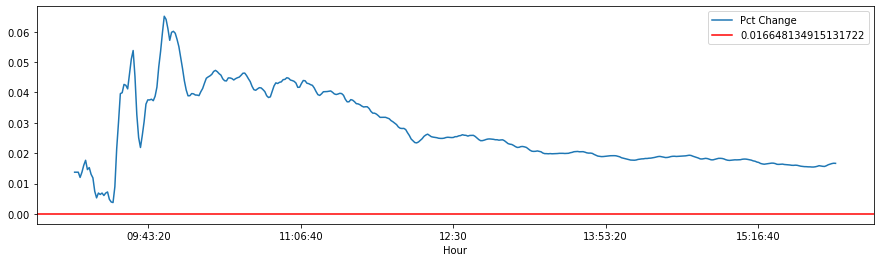

In [17]:
day = []
for tmp in aapl_days:
    # percent change every 1 minute
    day = tmp.loc[:]
    period = 3
    current = day['Open']
    previous = day['Open'].shift(period)
    day['Pct Change'] = (((current - previous) / previous) * 100)#.fillna(0)
    day['Average'] = day['Pct Change'].mean()
    day['Rolling Mean'] = day['Pct Change'].expanding().mean()
    

    # Calculate mean for each day and plot
    ax = day.plot('Hour', ['Rolling Mean'], figsize=(15,4))
    #day.plot('Hour', ['Average'], ax=ax, figsize=(15,4))
    ax.axhline(0,color='red')
    ax.legend(['Pct Change', day['Average'][0]])

In [18]:
# finds rows that are .001 percent away from a price
percent =  0.001
def close(df):
    return df.query('(1-@percent) * @price <= Open <= (1+@percent)*@price')

In [30]:
close(day)

Hour                 Time      Open      High  \
Day        Ticker                                                      
2021-08-12 AAPL    09:00:00  2021-08-12 09:00:00  145.6100  145.6100   
           AAPL    09:01:00  2021-08-12 09:01:00  145.6100  145.6300   
           AAPL    09:02:00  2021-08-12 09:02:00  145.6100  145.6300   
           AAPL    09:03:00  2021-08-12 09:03:00  145.6300  145.6500   
           AAPL    09:04:00  2021-08-12 09:04:00  145.6300  145.6300   
           AAPL    09:05:00  2021-08-12 09:05:00  145.6300  145.6500   
           AAPL    09:06:00  2021-08-12 09:06:00  145.6400  145.6700   
           AAPL    09:07:00  2021-08-12 09:07:00  145.6600  145.6600   
           AAPL    09:08:00  2021-08-12 09:08:00  145.6700  145.6900   
           AAPL    09:09:00  2021-08-12 09:09:00  145.6800  145.6800   
           AAPL    09:10:00  2021-08-12 09:10:00  145.6500  145.6600   
           AAPL    09:11:00  2021-08-12 09:11:00  145.7000  145.7100   
           AAPL    09:12:00  2021-08-12 09:12:00  145.6701  145.6701   
           AAPL    09:13:00  2021-08-12 09:13:00  145.6500  145.6500   
           AAPL    09:14:00  2021-08-12 09:14:00  145.6400  145.6500   
           AAPL    09:15:00  2021-08-12 09:15:00  145.6400  145.6900   
           AAPL    09:16:00  2021-08-12 09:16:00  145.6900  145.6900   
           AAPL    09:17:00  2021-08-12 09:17:00  145.6400  145.6600   
           AAPL    09:18:00  2021-08-12 09:18:00  145.6600  145.6800   
           AAPL    09:19:00  2021-08-12 09:19:00  145.6800  145.6800   
           AAPL    09:20:00  2021-08-12 09:20:00  145.6700  145.6800   
           AAPL    09:21:00  2021-08-12 09:21:00  145.6800  145.6800   
           AAPL    09:22:00  2021-08-12 09:22:00  145.6200  145.6500   
           AAPL    09:23:00  2021-08-12 09:23:00  145.6500  145.6800   
           AAPL    09:24:00  2021-08-12 09:24:00  145.6800  145.7800   

                        Low    Close  Volume  Pct Change   Average  \
Day        Ticker                                                    
2021-08-12 AAPL    145.5700  145.570   15378         NaN  0.016648   
           AAPL    145.5769  145.630    4700         NaN  0.016648   
           AAPL    145.6000  145.620    1801         NaN  0.016648   
           AAPL    145.6300  145.630    3975    0.013735  0.016648   
           AAPL    145.6300  145.630     700    0.013735  0.016648   
           AAPL    145.6300  145.630    4598    0.013735  0.016648   
           AAPL    145.6400  145.670    1560    0.006867  0.016648   
           AAPL    145.6500  145.660    1673    0.020600  0.016648   
           AAPL    145.6700  145.670    6485    0.027467  0.016648   
           AAPL    145.6600  145.660    3361    0.027465  0.016648   
           AAPL    145.6500  145.660    1667   -0.006865  0.016648   
           AAPL    145.6600  145.680    3783    0.020594  0.016648   
           AAPL    145.6200  145.640   12520   -0.006796  0.016648   
           AAPL    145.6400  145.640    2011    0.000000  0.016648   
           AAPL    145.6300  145.635    5176   -0.041181  0.016648   
           AAPL    145.6400  145.690    2441   -0.020663  0.016648   
           AAPL    145.6000  145.650    2356    0.027463  0.016648   
           AAPL    145.6300  145.660    1236    0.000000  0.016648   
           AAPL    145.6600  145.680    2577    0.013732  0.016648   
           AAPL    145.6700  145.670    1273   -0.006864  0.016648   
           AAPL    145.6600  145.660    6278    0.020599  0.016648   
           AAPL    145.6300  145.630     500    0.013731  0.016648   
           AAPL    145.6200  145.650     859   -0.041186  0.016648   
           AAPL    145.6400  145.680    2131   -0.013730  0.016648   
           AAPL    145.6700  145.780    3338    0.000000  0.016648   

                   Rolling Mean  
Day        Ticker                
2021-08-12 AAPL             NaN  
           AAPL             NaN  
           AAPL             NaN  
           AAPL  

In [27]:
(day.Open <= 1+percent*price)

False

In [29]:
(1+percent)*price

145.75561

In [22]:
day

Hour                 Time     Open     High       Low  \
Day        Ticker                                                              
2021-08-12 AAPL    09:00:00  2021-08-12 09:00:00  145.610  145.610  145.5700   
           AAPL    09:01:00  2021-08-12 09:01:00  145.610  145.630  145.5769   
           AAPL    09:02:00  2021-08-12 09:02:00  145.610  145.630  145.6000   
           AAPL    09:03:00  2021-08-12 09:03:00  145.630  145.650  145.6300   
           AAPL    09:04:00  2021-08-12 09:04:00  145.630  145.630  145.6300   
...                     ...                  ...      ...      ...       ...   
           AAPL    15:55:00  2021-08-12 15:55:00  148.950  149.000  148.9500   
           AAPL    15:56:00  2021-08-12 15:56:00  148.980  149.030  148.9700   
           AAPL    15:57:00  2021-08-12 15:57:00  149.010  149.050  149.0000   
           AAPL    15:58:00  2021-08-12 15:58:00  149.045  149.050  148.9300   
           AAPL    15:59:00  2021-08-12 15:59:00  148.980  149.005  148.8600   

                      Close  Volume  Pct Change   Average  Rolling Mean  
Day        Ticker                                                        
2021-08-12 AAPL    145.5700   15378         NaN  0.016648           NaN  
           AAPL    145.6300    4700         NaN  0.016648           NaN  
           AAPL    145.6200    1801         NaN  0.016648           NaN  
           AAPL    145.6300    3975    0.013735  0.016648      0.013735  
           AAPL    145.6300     700    0.013735  0.016648      0.013735  
...                     ...     ...         ...       ...           ...  
           AAPL    148.9715  680020    0.147919  0.016648      0.016183  
           AAPL    149.0100  476187    0.100786  0.016648      0.016388  
           AAPL    149.0450  404333    0.094042  0.016648      0.016575  
           AAPL    148.9800  527596    0.063780  0.016648      0.016688  
           AAPL    148.8850  697022    0.000000  0.016648      0.016648  

[420 rows x 10 columns]